**Author:** Lisa Wallner  
**Description:**  In this notebook the evaluation results of the first 50 README files which are generated with the llm *jamba-1.5-mini* and *llama3.1-8b* are analysed. In this evaluation the results of the first and the modified prompt will compared with each other. Keep in mind, the evaluation scores of the orignal README are the same like in df_score_lama because it make no sense the evaluate the same file twice.
 

*Hint: If lines are created with support of a Large Language Model or the code is taken from another source, you find following hint at the end of the line: (generated with Microsoft Copilot) or (source: link_to_source)*

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
import seaborn as sns
import numpy as np

### Universal Functions

In [2]:
def load_data(path):
    with open(path, 'r') as f:
        loaded_data = json.load(f)

    df = pd.DataFrame(data=loaded_data)

    return df

## df_llama_com

In [3]:
df_llama_com = load_data('../data/evaluation_results/df_llama_com.json')
df_llama_com = df_llama_com.loc[0:49]

In [4]:
len(df_llama_com)

50

In [5]:
df_llama_com.head(3)

,id,repo_owner,repo_name,score_g,score_o
0,openstack_openstack,openstack,openstack,20.000000,19.333333
1,majumderb_rezero,majumderb,rezero,22.333333,23.333333
2,andkret_Cookbook,andkret,Cookbook,20.000000,21.333333


In [6]:
df_llama_com.describe()

,score_g,score_o
count,50.000000,50.000000
mean,19.600000,21.400000
std,1.639921,2.660708
min,16.000000,13.666667
25%,18.416667,20.416667
50%,19.666667,21.666667
75%,20.666667,23.666667
max,23.333333,24.666667


## df_jamba_com

In [7]:
df_jamba_com = load_data('../data/evaluation_results/df_jamba_com.json')

In [8]:
len(df_jamba_com)

50

In [9]:
df_jamba_com.head(3)

,id,repo_owner,repo_name,score_g,score_o
0,openstack_openstack,openstack,openstack,19.333333,19.333333
1,majumderb_rezero,majumderb,rezero,16.000000,23.333333
2,andkret_Cookbook,andkret,Cookbook,16.666667,21.333333


In [10]:
df_jamba_com.describe()

,score_g,score_o
count,50.000000,50.000000
mean,17.473333,21.400000
std,2.603059,2.660708
min,11.000000,13.666667
25%,16.083333,20.416667
50%,17.833333,21.666667
75%,19.333333,23.666667
max,21.666667,24.666667


## df_llama_com_mod

In [11]:
df_llama_com_mod = load_data('../data/evaluation_results/df_llama_com_mod.json')

In [12]:
len(df_llama_com_mod)

50

In [13]:
df_llama_com_mod.head(3)

,id,repo_owner,repo_name,score_g,score_o
0,openstack_openstack,openstack,openstack,20.000000,19.333333
1,majumderb_rezero,majumderb,rezero,21.666667,23.333333
2,andkret_Cookbook,andkret,Cookbook,19.000000,21.333333


In [14]:
df_llama_com_mod.describe()

,score_g,score_o
count,50.000000,50.000000
mean,20.160000,21.400000
std,1.419399,2.660708
min,16.333333,13.666667
25%,19.333333,20.416667
50%,20.333333,21.666667
75%,21.250000,23.666667
max,23.666667,24.666667


## df_jamba_com_mod

In [15]:
df_jamba_com_mod = load_data('../data/evaluation_results/df_jamba_com_mod.json')

In [16]:
len(df_jamba_com_mod)

50

In [17]:
df_jamba_com_mod.head(3)

,id,repo_owner,repo_name,score_g,score_o
0,openstack_openstack,openstack,openstack,19.333333,19.333333
1,majumderb_rezero,majumderb,rezero,16.666667,23.333333
2,andkret_Cookbook,andkret,Cookbook,19.333333,21.333333


In [18]:
df_jamba_com_mod.describe()

,score_g,score_o
count,50.000000,50.000000
mean,18.366667,21.400000
std,3.782793,2.660708
min,8.666667,13.666667
25%,16.333333,20.416667
50%,19.333333,21.666667
75%,20.916667,23.666667
max,24.000000,24.666667


## Visualize

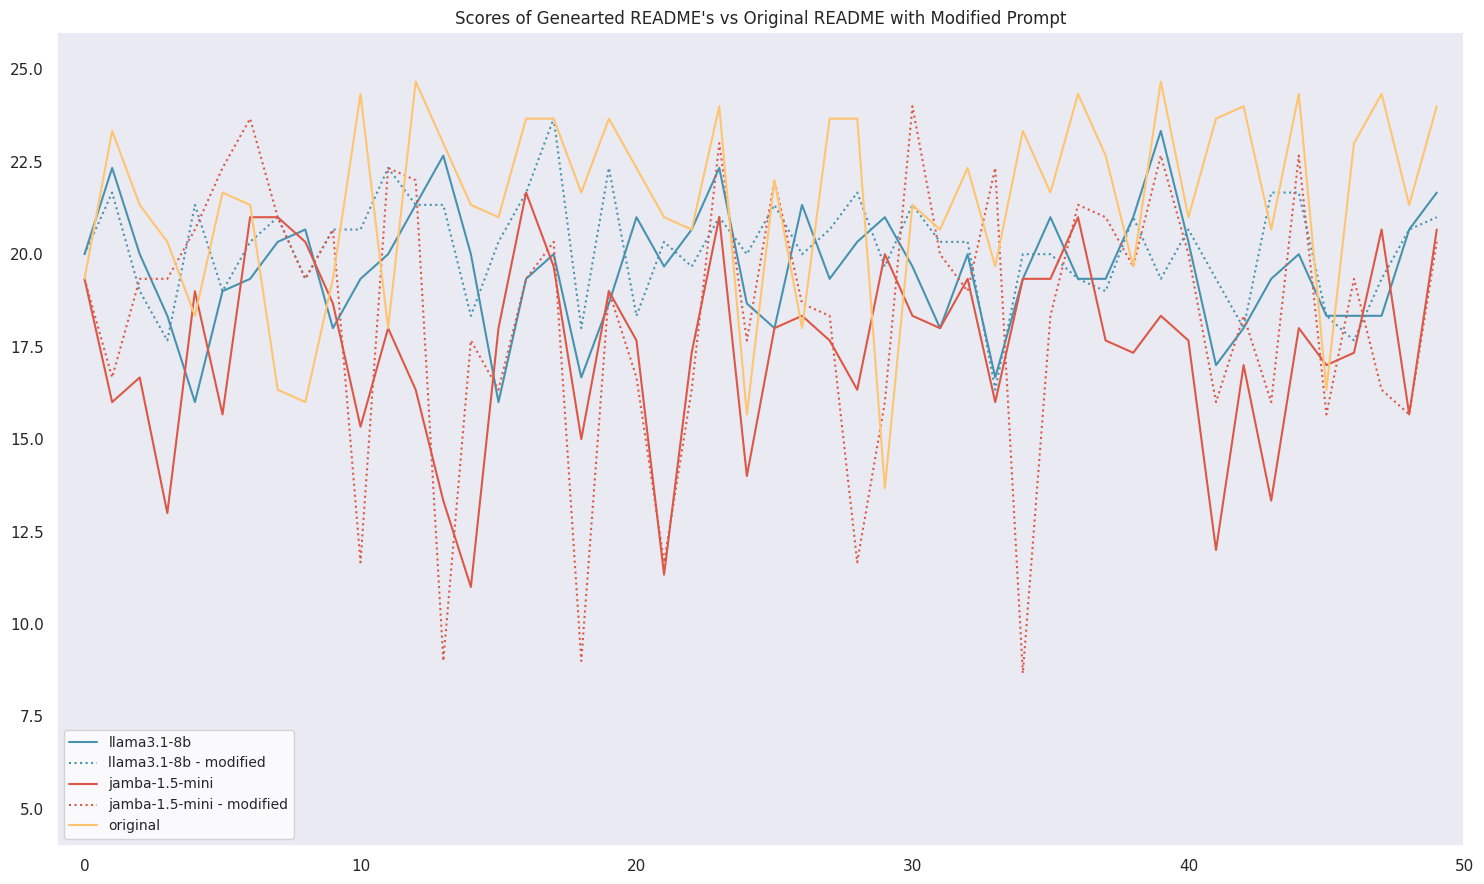

In [19]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(figsize=(15, 9)) # create a figure and define size of plot

    # llama
    l_score_g = df_llama_com['score_g']
    l_score_o = df_llama_com['score_o']

    # llama_mod
    l_mod_score_g = df_llama_com_mod['score_g']
    #l_mod_score_o = df_llama_com_mod['score_o']

    # jamba
    j_score_g = df_jamba_com['score_g']
    #j_score_o = df_jamba_com['score_o']

    # jamba_mod
    j_mod_score_g = df_jamba_com_mod['score_g']
    #j_mod_score_o = df_jamba_com_mod['score_o']

    x_numeric = np.arange(len(l_score_o))

    # generated
    ax.plot(x_numeric, l_score_g , label='llama3.1-8b', color='#4793AF')
    ax.plot(x_numeric, l_mod_score_g, label='llama3.1-8b - modified', color='#4793AF', linestyle=':')
    ax.plot(x_numeric, j_score_g, label='jamba-1.5-mini', color='#DD5746')
    ax.plot(x_numeric, j_mod_score_g, label='jamba-1.5-mini - modified', color='#DD5746', linestyle=':')
    ax.plot(x_numeric, l_score_o , label='original', color='#FFC470')
    
    ax.set_title("Scores of Genearted README's vs Original README with Modified Prompt")
    ax.legend(loc=3, fontsize=10, facecolor='white')
    ax.set_xlim(-1,50)
    ax.set_ylim(4,26)

    plt.grid(visible=False) # turn of grid
    plt.tight_layout()
    plt.show() # shows plot

sns.reset_defaults() # reset Seaborn settings

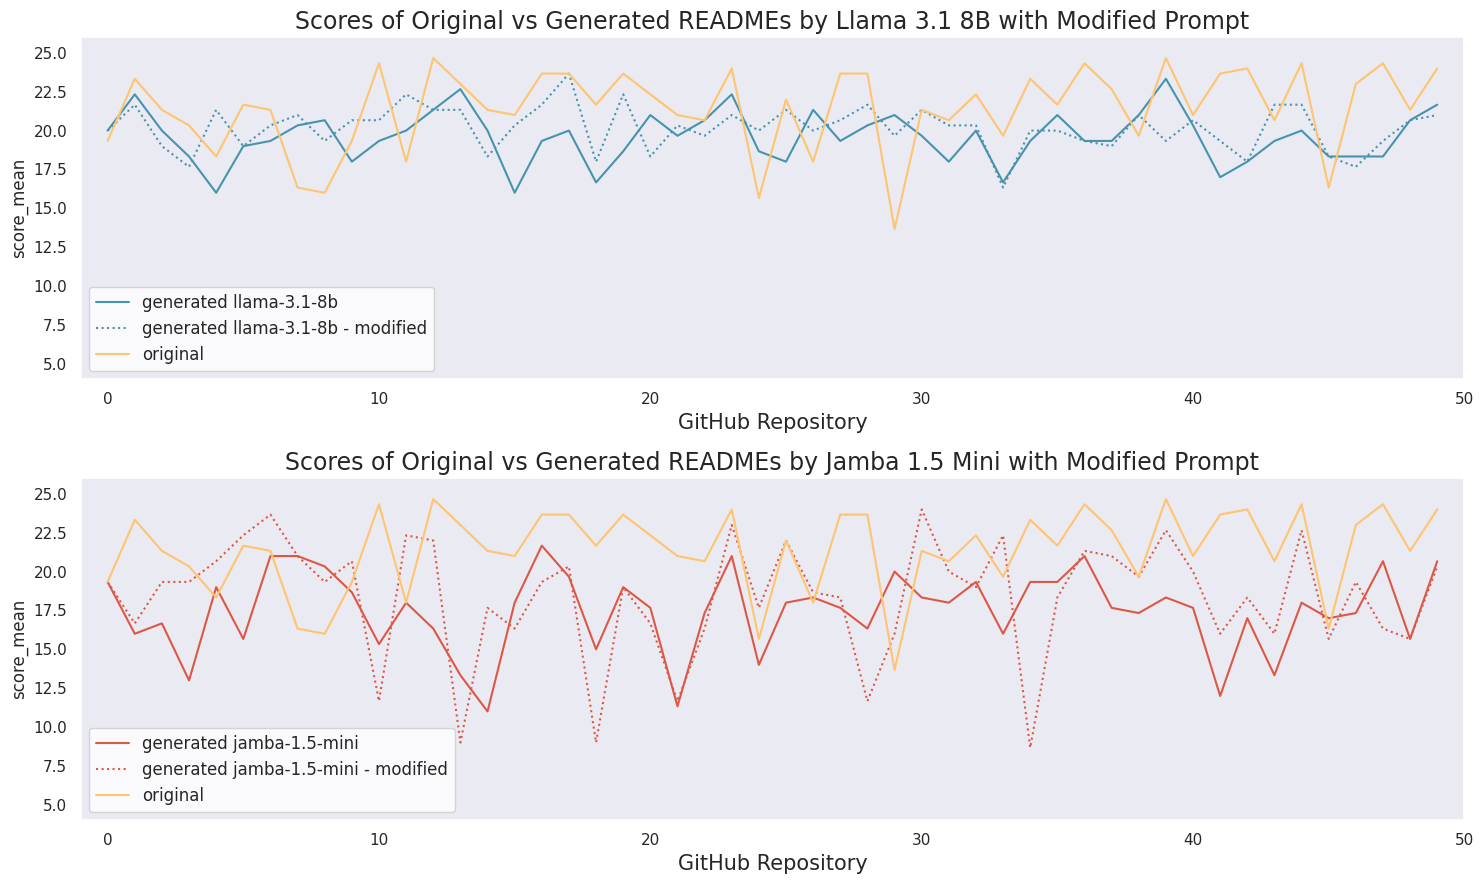

In [27]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15, 9)) # create a figure and define size of plot

    # llama
    l_score_g = df_llama_com['score_g']
    l_score_o = df_llama_com['score_o']

    # llama_mod
    l_mod_score_g = df_llama_com_mod['score_g']
    #l_mod_score_o = df_llama_com_mod['score_o']

    # jamba
    j_score_g = df_jamba_com['score_g']
    #j_score_o = df_jamba_com['score_o']

    # jamba_mod
    j_mod_score_g = df_jamba_com_mod['score_g']
    #j_mod_score_o = df_jamba_com_mod['score_o']

    x_numeric = np.arange(len(l_score_o))

    # llama
    ax[0].plot(x_numeric, l_score_g , label='generated llama-3.1-8b', color='#4793AF')
    ax[0].plot(x_numeric, l_mod_score_g, label='generated llama-3.1-8b - modified', color='#4793AF', linestyle=':')
    ax[0].plot(x_numeric, l_score_o , label='original', color='#FFC470')

    # jamba
    ax[1].plot(x_numeric, j_score_g, label='generated jamba-1.5-mini', color='#DD5746')
    ax[1].plot(x_numeric, j_mod_score_g, label='generated jamba-1.5-mini - modified', color='#DD5746', linestyle=':')
    ax[1].plot(x_numeric, l_score_o , label='original', color='#FFC470')
    
    ax[0].set_title("Scores of Original vs Generated READMEs by Llama 3.1 8B with Modified Prompt", fontsize= 17)
    ax[0].legend(loc=3, fontsize=12, facecolor='white')
    ax[0].set_xlim(-1,50)
    ax[0].set_xlabel('GitHub Repository', fontsize=15)
    ax[0].set_ylim(4,26)
    ax[0].set_ylabel('score_mean')

    ax[1].set_title("Scores of Original vs Generated READMEs by Jamba 1.5 Mini with Modified Prompt", fontsize=17)
    ax[1].legend(loc=3, fontsize=12, facecolor='white')
    ax[1].set_xlim(-1,50)
    ax[1].set_xlabel('GitHub Repository', fontsize=15)
    ax[1].set_ylim(4,26)
    ax[1].set_ylabel('score_mean')

    plt.grid(visible=False) # turn of grid
    plt.tight_layout()
    plt.show() # shows plot

sns.reset_defaults() # reset Seaborn settings

In [28]:
fig.savefig("../pngs_ma/total_score_50_llama_jamba_mod.pdf")